### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#Importing necessary libraries
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
house = pd.read_csv(r"D:\Upgrad Data Science PGDDS\Machine Learning II\Module 5 Assignment\train.csv")

In [3]:
#Inspecting the dataframe
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Checking the shape of the house
house.shape

(1460, 81)

In [5]:
#Checking the info of the dataframe
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#Checking for duplicate values in the dataframe
duplicates=house[house.duplicated()]
(duplicates)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Hence there are no duplicates in the dataset.**

In [8]:
#Dropping the Id column as we don't need it for our analysis
house=house.drop("Id",1)

## Analysing the Response Variable

In [9]:
#Analyzing the response variable
house.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

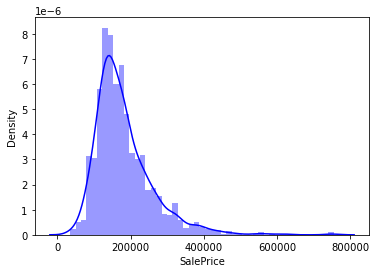

The skew is 1.8828757597682129


In [10]:
#Checking the skew of the response variable
sns.distplot(house.SalePrice, color='blue')
plt.show()
print("The skew is",house.SalePrice.skew())

**We see that the skew value is postiive which means that the response variable is positive skewed. We can do some kind of data transformation if needed.**

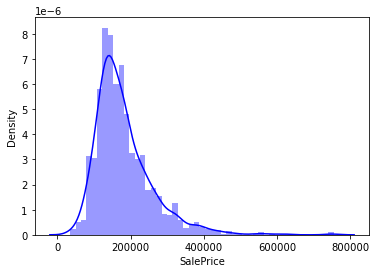

Skew is: 1.8828757597682129


In [11]:
sns.distplot(house.SalePrice, color='blue')
plt.show()
print ("Skew is:", house.SalePrice.skew())

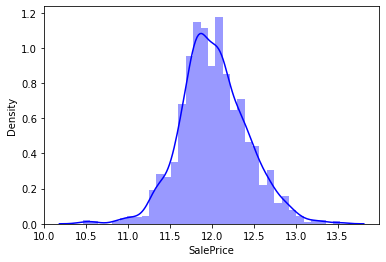

Skew is: 0.12133506220520406


In [12]:
#Plot after transforming the response variable
house.SalePrice=np.log(house.SalePrice)
sns.distplot(house.SalePrice, color='blue')
plt.show()
print ("Skew is:", house.SalePrice.skew())

**We see that after a log transformation, this response variable's skewness is normal. This is done because our final model metrics improves a lot after transforming the response variable.**


# Feature Engineering

**We can add total area as a new feature for it may be insightful. It will be the total of TotalBsmtSF,1stFlrSF and 2ndFlrSF values.**

In [13]:
#Adding total area of the plot
house["TotAreaSF"]= house["TotalBsmtSF"] + house["1stFlrSF"] + house["2ndFlrSF"]

In [14]:
#Dropping the original variables to avoid multi collinearity
house=house.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF"],1)

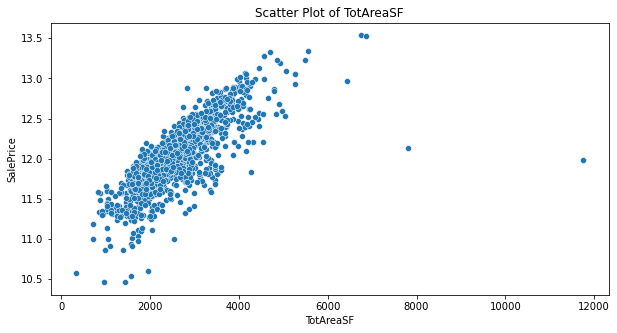

In [15]:
#PLotting SalePrice vs TotAreaSF
plt.figure(figsize=(10,5))
sns.scatterplot(x="TotAreaSF",y="SalePrice",data=house)
plt.title("Scatter Plot of TotAreaSF")
plt.xlabel("TotAreaSF")
plt.ylabel("SalePrice")
plt.show()

**Inferences Drawn:**
1. We see that it follows a Linear relationship as well with the response variable.

In [16]:
#Adding age of the house
house["Age"]=house["YrSold"]-house["YearBuilt"]

In [17]:
#Removing original columns to avoid correlation
house=house.drop(["YrSold","YearBuilt"],1)

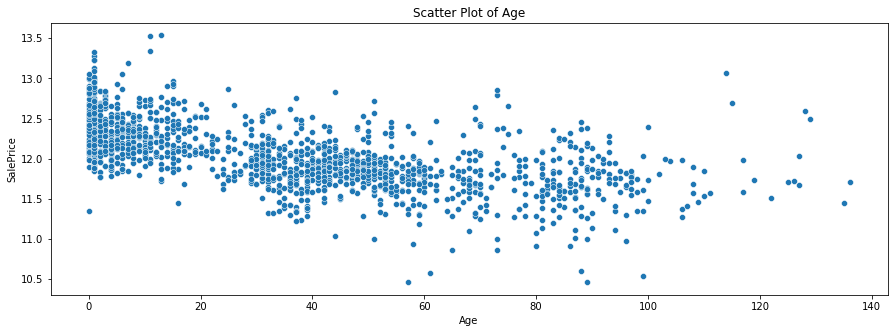

In [18]:
#PLotting SalePrice vs Age
plt.figure(figsize=(15,5))
sns.scatterplot(x="Age",y="SalePrice",data=house)
plt.title("Scatter Plot of Age")
plt.xlabel("Age")
plt.ylabel("SalePrice")
plt.show()

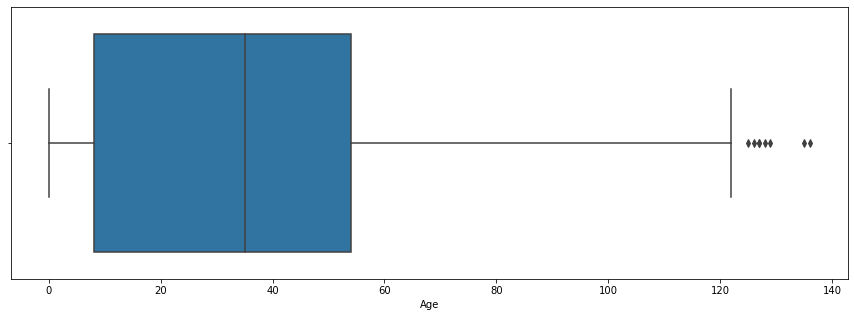

In [19]:
#PLotting Boxplot of Age
plt.figure(figsize=(15,5))
sns.boxplot(x="Age",data=house)
plt.show()

**Inferences Drawn:**
1. We see that as the age of the house is increasing the saleprice is decreasing.
2. Old houses has less saleprice.
3. New houses have high saleprice.
4. This variable must have a high negative correlation with the response variable.

In [20]:
#Adding age after remoddeling column
house['Age_after_remod']=2021-house['YearRemodAdd']

In [21]:
#Removing Original columns to avoid multi collinearity
house=house.drop(["YearRemodAdd"],1)

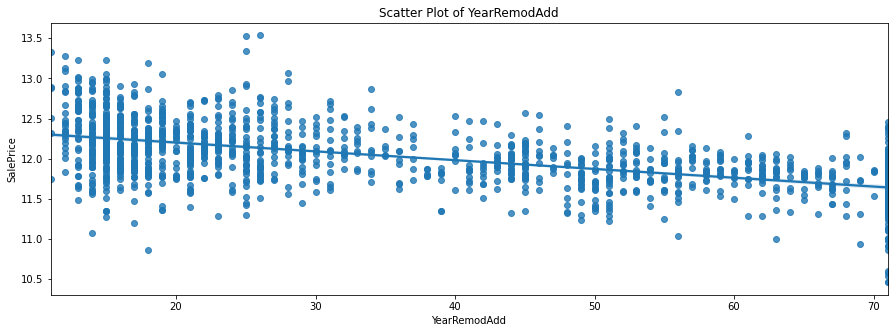

In [22]:
#PLotting SalePrice vs Age_before_remod
plt.figure(figsize=(15,5))
sns.regplot(x="Age_after_remod",y="SalePrice",data=house)
plt.title("Scatter Plot of YearRemodAdd")
plt.xlabel("YearRemodAdd")
plt.ylabel("SalePrice")
plt.show()

**Inferences Drawn:**
1. We see that house having 0 years of age before modification i.e the remod year and the built year were the same are having high sale price.
2. Most of the house with less age are costlier than the ones which are having higher age after remodelling the house.

In [23]:
#Dropping unnecessary columns which has no significance
house=house.drop(["GarageYrBlt","MoSold"],1)

# Multivariate Analysis

In [24]:
#PLotting the correlation matrix
corr=house.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotAreaSF,Age,Age_after_remod
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.022936,-0.069836,-0.065649,-0.140759,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.073959,-0.082225,-0.028746,-0.040581
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.193458,0.233633,0.049900,0.132644,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.355878,0.461464,-0.122848,-0.088866
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.104160,0.214103,0.111170,-0.002618,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.257320,0.307234,-0.014832,-0.013788
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.411876,0.239666,-0.059119,0.308159,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.817184,0.668155,-0.572629,-0.550684
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.128101,-0.046231,0.040229,-0.136841,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.036868,-0.143814,0.377325,-0.073741
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,1.000000,0.264736,-0.072319,0.114442,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.430809,0.448528,-0.315562,-0.179618
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.264736,1.000000,-0.050117,-0.495251,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.372023,0.415843,-0.248483,-0.128451
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.072319,-0.050117,1.000000,-0.209294,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,0.004832,0.048916,0.050422,0.067759
BsmtUnfSF,-0.140759,0.132644,-0.002618,0.308159,-0.136841,0.114442,-0.495251,-0.209294,1.000000,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.221985,0.373733,-0.150619,-0.181133
LowQualFinSF,0.046474,0.038469,0.004779,-0.030429,0.025494,-0.069071,-0.064503,0.014807,0.028167,1.000000,0.134683,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,0.007522,0.131185,-0.021272,-0.094480,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.037963,0.009207,0.182228,0.062419


**Since this ain't insightful we will try to make a heatmap to see which variable show high correlation with the response variable.**

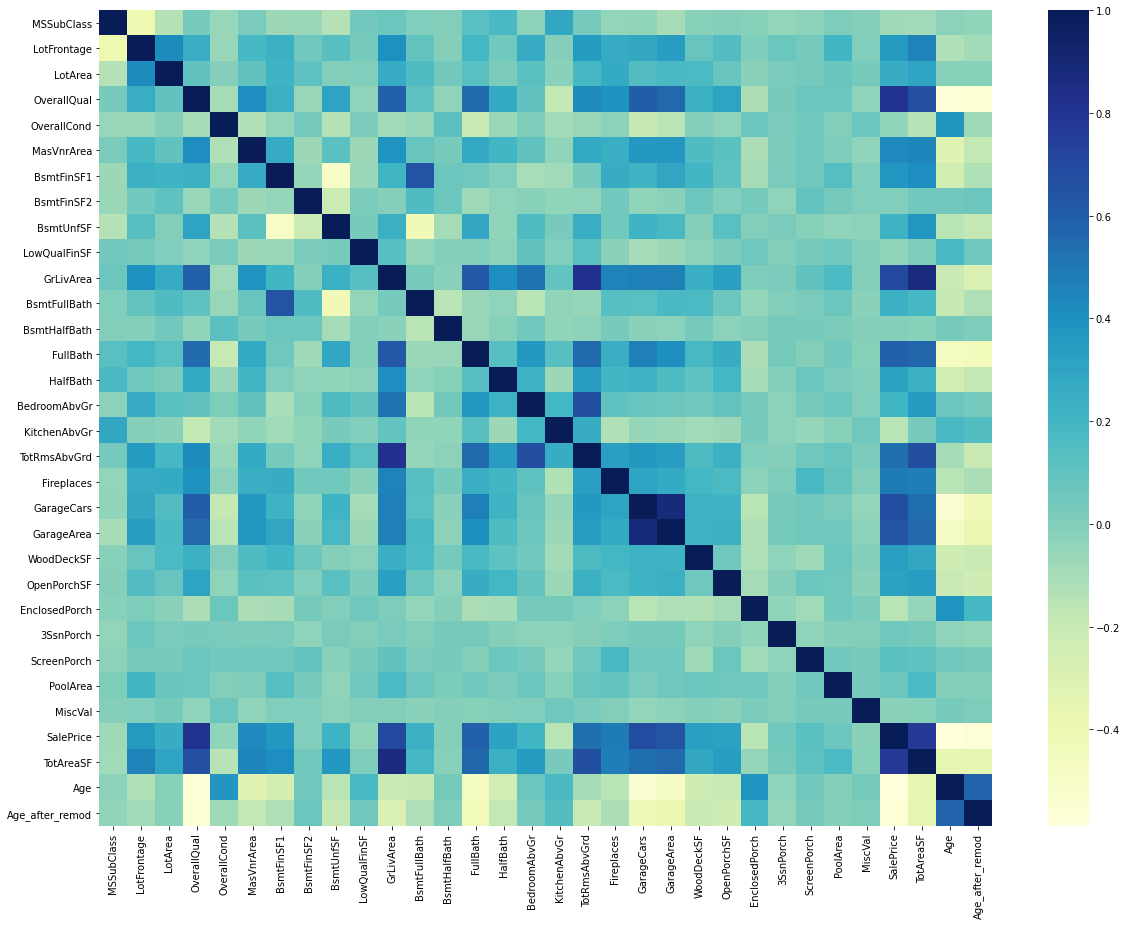

In [25]:
# plotting correlations on a heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

In [26]:
#Checking for variables having max correlation with the response variable
k=38
round(corr.nlargest(k, 'SalePrice')['SalePrice'],2)

SalePrice          1.00
OverallQual        0.82
TotAreaSF          0.78
GrLivArea          0.70
GarageCars         0.68
GarageArea         0.65
FullBath           0.59
TotRmsAbvGrd       0.53
Fireplaces         0.49
MasVnrArea         0.43
BsmtFinSF1         0.37
LotFrontage        0.36
WoodDeckSF         0.33
OpenPorchSF        0.32
HalfBath           0.31
LotArea            0.26
BsmtFullBath       0.24
BsmtUnfSF          0.22
BedroomAbvGr       0.21
ScreenPorch        0.12
PoolArea           0.07
3SsnPorch          0.05
BsmtFinSF2         0.00
BsmtHalfBath      -0.01
MiscVal           -0.02
OverallCond       -0.04
LowQualFinSF      -0.04
MSSubClass        -0.07
KitchenAbvGr      -0.15
EnclosedPorch     -0.15
Age_after_remod   -0.57
Age               -0.59
Name: SalePrice, dtype: float64

**Inferences Drawn:**
1. OverallQual has the max correlation variable with the response followed by TotAreaSF which is a derived variable.
2. The next correlated variables with the response variable are GrLivArea which is obvious because people do prefer a big living area.
3. We see that the variable GarageCars and GarageArea are highly correlated. It would be correlated since the GarageArea will increase if the value of GarageCars increase. Hence we need to drop one variable. We will drop that variable which has less correlation with the response variable.
4. Same goes with the TotRmsAbvGrd and GrLivArea which has high correlation. Hence would drop TotRmsAbvGrd since it has less correlation with the response variable.
5. Age as we can see as high negative correlation with the response variable followed by Age_after_remod. This is obvious to happen as with age Saleprice seems to decrease.

In [27]:
#Checking for high correlation variables
criteria = corr[corr.iloc[:,:]>= 0.7 ]     
print(criteria)

                 MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass              1.0          NaN      NaN          NaN          NaN   
LotFrontage             NaN          1.0      NaN          NaN          NaN   
LotArea                 NaN          NaN      1.0          NaN          NaN   
OverallQual             NaN          NaN      NaN     1.000000          NaN   
OverallCond             NaN          NaN      NaN          NaN          1.0   
MasVnrArea              NaN          NaN      NaN          NaN          NaN   
BsmtFinSF1              NaN          NaN      NaN          NaN          NaN   
BsmtFinSF2              NaN          NaN      NaN          NaN          NaN   
BsmtUnfSF               NaN          NaN      NaN          NaN          NaN   
LowQualFinSF            NaN          NaN      NaN          NaN          NaN   
GrLivArea               NaN          NaN      NaN          NaN          NaN   
BsmtFullBath            NaN          NaN      NaN   

In [28]:
#Removing highly correlated independent variables
house=house.drop(["GarageArea","TotRmsAbvGrd"],1)

**Inferences Drawn:**
1. OverallQual has the max correlation followed by TotAreaSF which is a derived variable.
2. The next pair of correlated variables with the response variable are GrLivArea and GarageCars.
3. We see that TotalBsmtSF and 1stFlrSF have very close correlation with the response variable. Therefore we need one of those variables in our analysis.
4. In total we have 10 highly correlated variables with the response variable.

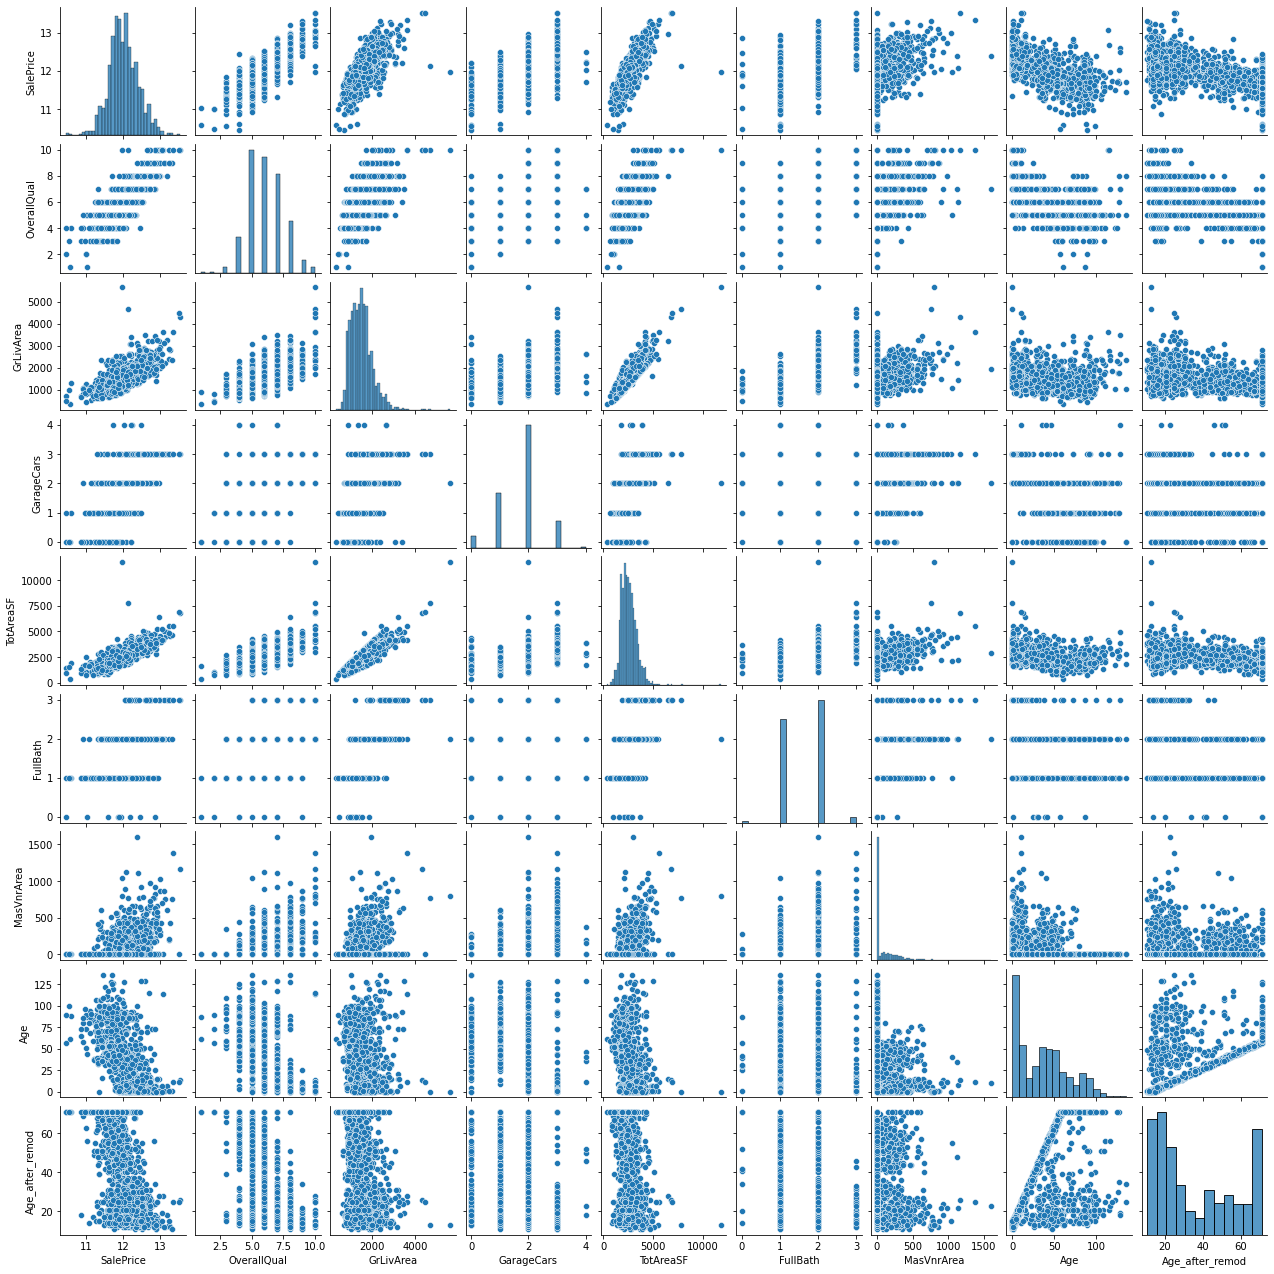

In [29]:
#Plotting highly correlated variables with pairplot
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotAreaSF','FullBath',"MasVnrArea","Age","Age_after_remod"]
sns.pairplot(house[cols], size = 2)
plt.show()

**Inferences Drawn:**
1. We see that the variables GrLivArea and TotAreaSF show linear relationships with the response variable.
2. We see that TotAreaSF show linear relationships with GrLivArea.
3. Age and Age_after_remod have highly negative relation with the response variable.

# Bivariate Analysis

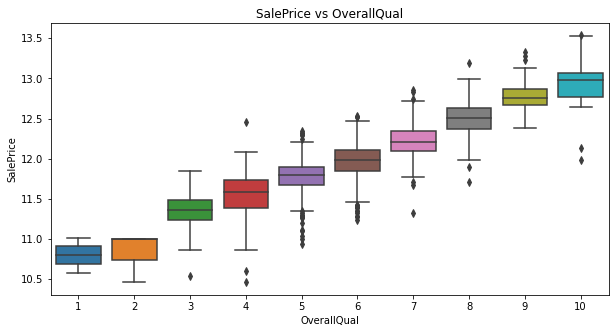

In [30]:
#PLotting SalePrice vs OverallQual
plt.figure(figsize=(10,5))
sns.boxplot(x='OverallQual', y="SalePrice", data=house)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("SalePrice vs OverallQual")
plt.show()

**Inferences Drawn:**
1. SalePrice increases with the increase in quality of the house.
2. Hence this variable has a high positive correlation with the predictor variable.

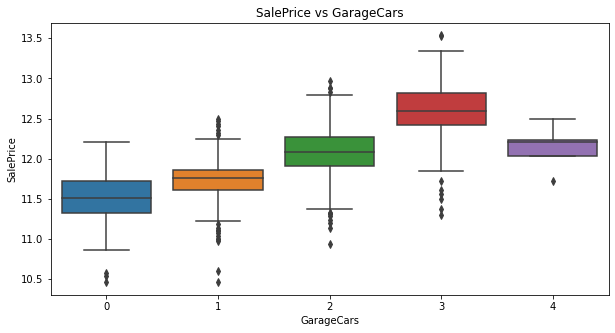

In [31]:
#PLotting SalePrice vs GarageCars
plt.figure(figsize=(10,5))
sns.boxplot(x='GarageCars',  y="SalePrice",data=house)
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.title("SalePrice vs GarageCars")
plt.show()

**Inferences Drawn:**
1. The SalePrice increase with the increase in Garage Cars.
2. The jump in the SalePrice when the value of the Garage Cars go from 2-3 is high.

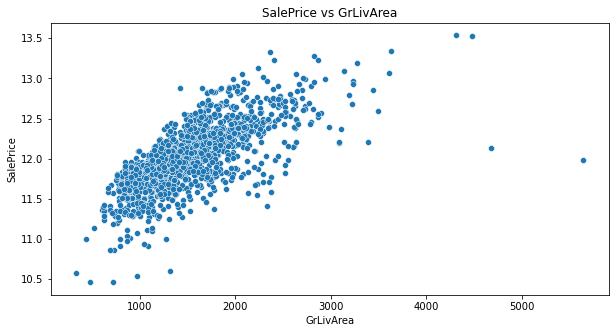

In [32]:
#PLotting SalePrice vs GrLivArea
plt.figure(figsize=(10,5))
sns.scatterplot(x="GrLivArea",y="SalePrice",data=house)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("SalePrice vs GrLivArea")
plt.show()

**Inferences Drawn:**
1. we see that this column follows a linear relaationship with the target variable.
2. There are presence of outliers.
3. With increase in GrLivArea, the SalePrice increases.

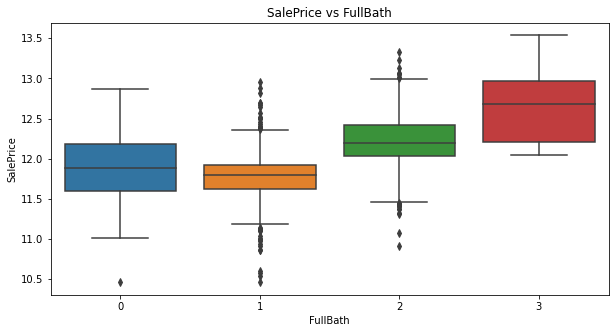

In [33]:
#PLotting SalePrice vs FullBath
plt.figure(figsize=(10,5))
sns.boxplot(x='FullBath', y="SalePrice", data=house)
plt.xlabel("FullBath")
plt.ylabel("SalePrice")
plt.title("SalePrice vs FullBath")
plt.show()

**Inferences Drawn:**
1. The SalePrice value doesn't follow a significant trend with this column.
2. The SalePrice has gone down when the amount of fullbath is 1 and is the lowest.
3. We see that the SalePrice of no Fullbath is high. There might be other factors which increase the price of the houses in this segment.
4. The jump in the SalePrice value from 1 Fullbath to 2 Fullbaths and from 2 Fullbaths to 3 Fullbaths is considerably high.

**We will do Univariate Analysis and Outlier Treatment after missing value treatment because that would give us better insights.**

# Data Cleaning

In [34]:
#Checking for Missing values total and Percentage
total = house.isnull().sum().sort_values(ascending=False)
percentage = ((house.isnull().sum()/house.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], 1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageFinish,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageQual,81,5.547945


**We will not delete those columns with missing values which have a meaning to NA. These columns might be important for our predictions, hence imputing them would be the right choice. In this way, we won't lose out on any data which might be quintessential important in our predictions.**

### Imputing High Missing values variables with None value

In [35]:
cols=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]
house[cols]=house[cols].fillna(value="None")

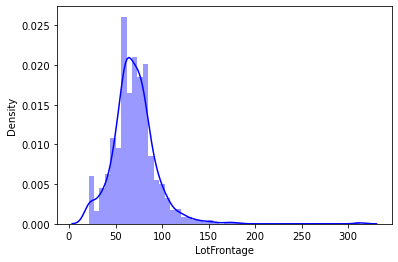

The skew is 2.163569142324884


In [36]:
#LotFrontage
sns.distplot(house.LotFrontage, color='blue')
plt.show()
print("The skew is",house.LotFrontage.skew())

In [37]:
house.LotFrontage.describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

**Hence this variable contains outliers, hence we will impute the missing values in it with median.**

In [38]:
med=house.LotFrontage.median()
house.LotFrontage=house.LotFrontage.fillna(med)

In [39]:
#Since these columns have NA value which has a meaning to it, we impute NA with 0 which seems apt here.
cols=['GarageCars']
house[cols]=house[cols].fillna(0)

In [40]:
#Since these columns have NA value which has a meaning to it, we impute NA with none which seems apt here.
cols=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
house[cols]=house[cols].fillna("None")

In [41]:
#Since these columns have NA value which has a meaning to it, we impute NA with none which seems apt here.
cols=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
house[cols]=house[cols].fillna("None")

In [42]:
#MasVnrType
house.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

**We will impute the missing values in this column by the mode.**

In [43]:
house.MasVnrType=house.MasVnrType.fillna("None")

In [44]:
#MasVnrArea
house.MasVnrArea.value_counts().sort_values(ascending=False).head(10)

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
16.0       7
80.0       6
200.0      6
106.0      6
340.0      6
Name: MasVnrArea, dtype: int64

**Since the max frequency is having 0 in this variable, NA values can be imputed to that value since we can't arbritarily assign numeric values to this column.**

In [45]:
house.MasVnrArea=house.MasVnrArea.fillna(0)

In [46]:
#Electrical
house.Electrical.value_counts(normalize=True)*100

SBrkr    91.432488
FuseA     6.442769
FuseF     1.850583
FuseP     0.205620
Mix       0.068540
Name: Electrical, dtype: float64

**Since this column has only one missing value and the number of SBrkr in this column is way higher than the other entries we can impute the missing value with this value.**

In [47]:
house.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [48]:
house.Electrical=house.Electrical.fillna(house.Electrical.mode()[0])

In [49]:
#Checking for Missing values again
total = house.isnull().sum().sort_values(ascending=False)
percentage = ((house.isnull().sum()/house.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], 1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
Age_after_remod,0,0.0
Heating,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


**We see that we don't have any missing values anymore. Sorted!!!**

### Checking for Data Errors

In [50]:
house.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [51]:
house.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

**We see that some of the names are not according to the Exterior1st column. Hence we change some values to the original one.**

In [52]:
house['Exterior2nd'].replace(['Brk Cmn', 'CmentBd', 'Wd Shng'], ['BrkComm', 'CemntBd', 'WdShing'], inplace=True)

# Univariate Analysis

### Class Imbalance Variables

#### Utilities

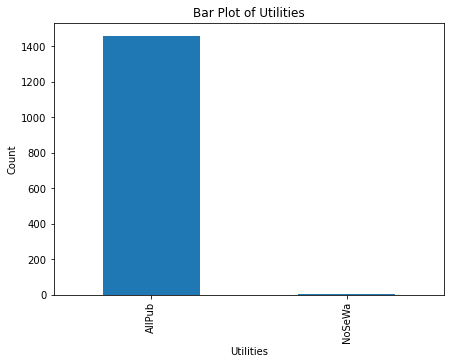

In [53]:
house.Utilities.value_counts().plot(kind="bar",figsize=(7,5))
plt.xlabel("Utilities")
plt.ylabel("Count")
plt.title("Bar Plot of Utilities")
plt.show()

#### Street

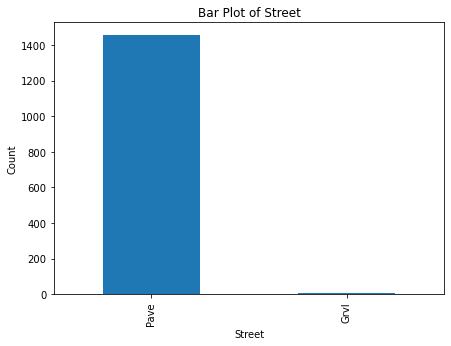

In [54]:
house.Street.value_counts().plot(kind="bar",figsize=(7,5))
plt.xlabel("Street")
plt.ylabel("Count")
plt.title("Bar Plot of Street")
plt.show()

#### Condition2

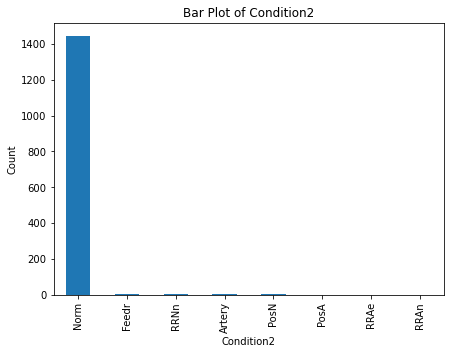

In [55]:
house.Condition2.value_counts().plot(kind="bar",figsize=(7,5))
plt.xlabel("Condition2")
plt.ylabel("Count")
plt.title("Bar Plot of Condition2")
plt.show()

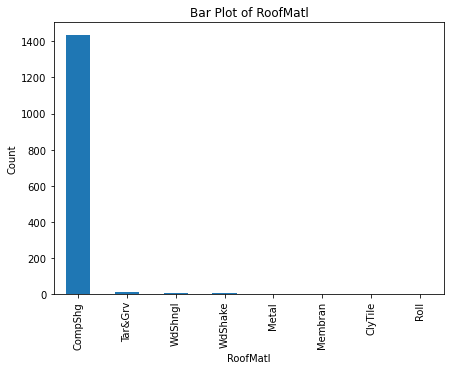

In [56]:
house.RoofMatl.value_counts().plot(kind="bar",figsize=(7,5))
plt.xlabel("RoofMatl")
plt.ylabel("Count")
plt.title("Bar Plot of RoofMatl")
plt.show()

#### Heating

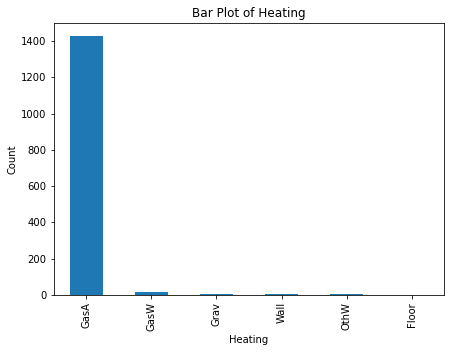

In [57]:
house.Heating.value_counts().plot(kind="bar",figsize=(7,5))
plt.xlabel("Heating")
plt.ylabel("Count")
plt.title("Bar Plot of Heating")
plt.show()

**Inferences Drawn:**
1. In all the above columns, we see that there exists one value in the respective columns whose count is way more than the rest in that column.
2. Hence we would drop such columns as it won't help us in our observations.

In [58]:
#Dropping the variables which have class imbalance
house=house.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

## Outlier Treatment

### TotAreaSF

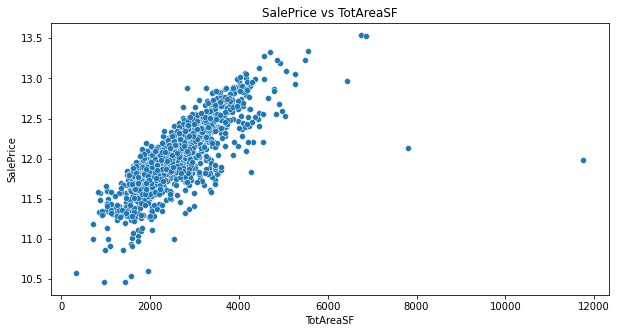

In [59]:
#PLotting SalePrice vs TotAreaSF
plt.figure(figsize=(10,5))
sns.scatterplot(x="TotAreaSF",y="SalePrice",data=house)
plt.xlabel("TotAreaSF")
plt.ylabel("SalePrice")
plt.title("SalePrice vs TotAreaSF")
plt.show()

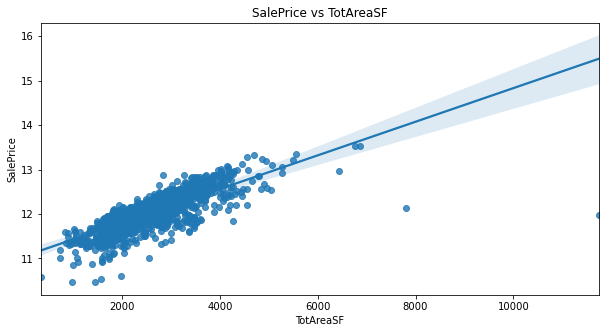

In [60]:
#PLotting SalePrice vs TotAreaSF
plt.figure(figsize=(10,5))
sns.regplot(x="TotAreaSF",y="SalePrice",data=house)
plt.xlabel("TotAreaSF")
plt.ylabel("SalePrice")
plt.title("SalePrice vs TotAreaSF")
plt.show()

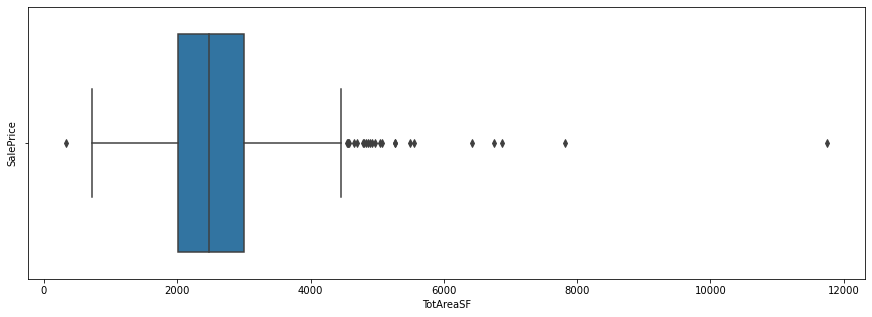

In [61]:
#PLotting Boxplot of TotAreaSF
plt.figure(figsize=(15,5))
sns.boxplot(x="TotAreaSF",data=house)
plt.xlabel("TotAreaSF")
plt.ylabel("SalePrice")
plt.show()

**Inferences Drawn:**
1. We can see that the two points on the right corner can be treated as outliers as they are not following the trend in the column.
2. Rest of the points will be retained as they are following the trend

In [62]:
#Deleting the outliers
house = house.drop(house[(house['TotAreaSF']>7000) & (house['SalePrice']<12.5)].index)

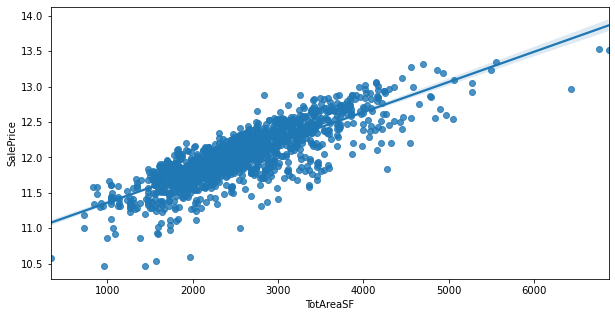

In [63]:
#PLotting SalePrice vs TotAreaSF again
plt.figure(figsize=(10,5))
sns.regplot(x="TotAreaSF",y="SalePrice",data=house)
plt.show()

### GrLivArea

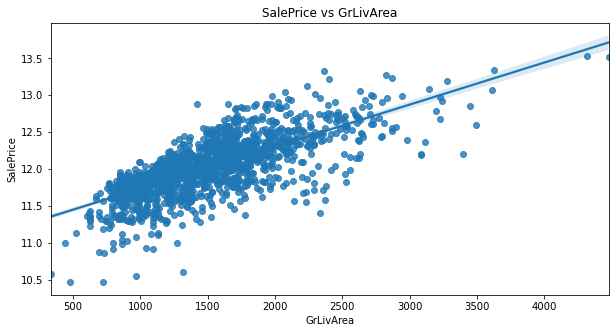

In [64]:
#PLotting SalePrice vs GrLivArea
plt.figure(figsize=(10,5))
sns.regplot(x="GrLivArea",y="SalePrice",data=house)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("SalePrice vs GrLivArea")
plt.show()

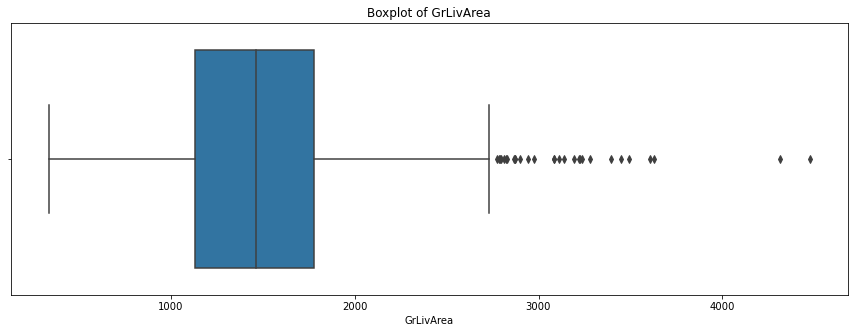

In [65]:
#PLotting boxplot of GrLivArea
plt.figure(figsize=(15,5))
sns.boxplot(x="GrLivArea",data=house)
plt.title("Boxplot of GrLivArea")
plt.show()

**Inferences Drawn:**
1. The two points on the top follow the trend. Like a higher GrLivArea will definitely give a higher saleprice. Hence we would keep those 2 values and would not treat them as outliers.

### GarageCars

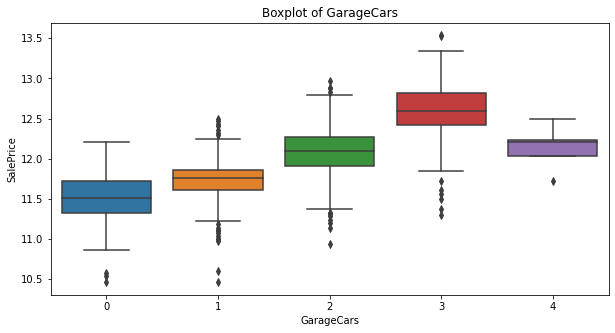

In [66]:
#PLotting SalePrice vs GarageArea
plt.figure(figsize=(10,5))
sns.boxplot(x="GarageCars",y="SalePrice",data=house)
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.title("Boxplot of GarageCars")
plt.show()

**Inferences Drawn:**
1. We can see that the value of SalePrice increases with increase in the number of GarageCars which is kinda obvious.
2. We see that there are outliers in the data but we won't treat them now. We wil further do log transformations to reduce the skewness and implement robust methods to make our model reliable.

## Checking for Skewness

In [67]:
#Checking for normality of all the non numeric columns
quantitative = [f for f in house.columns if house.dtypes[f] != 'object']
quantitative.remove('SalePrice')

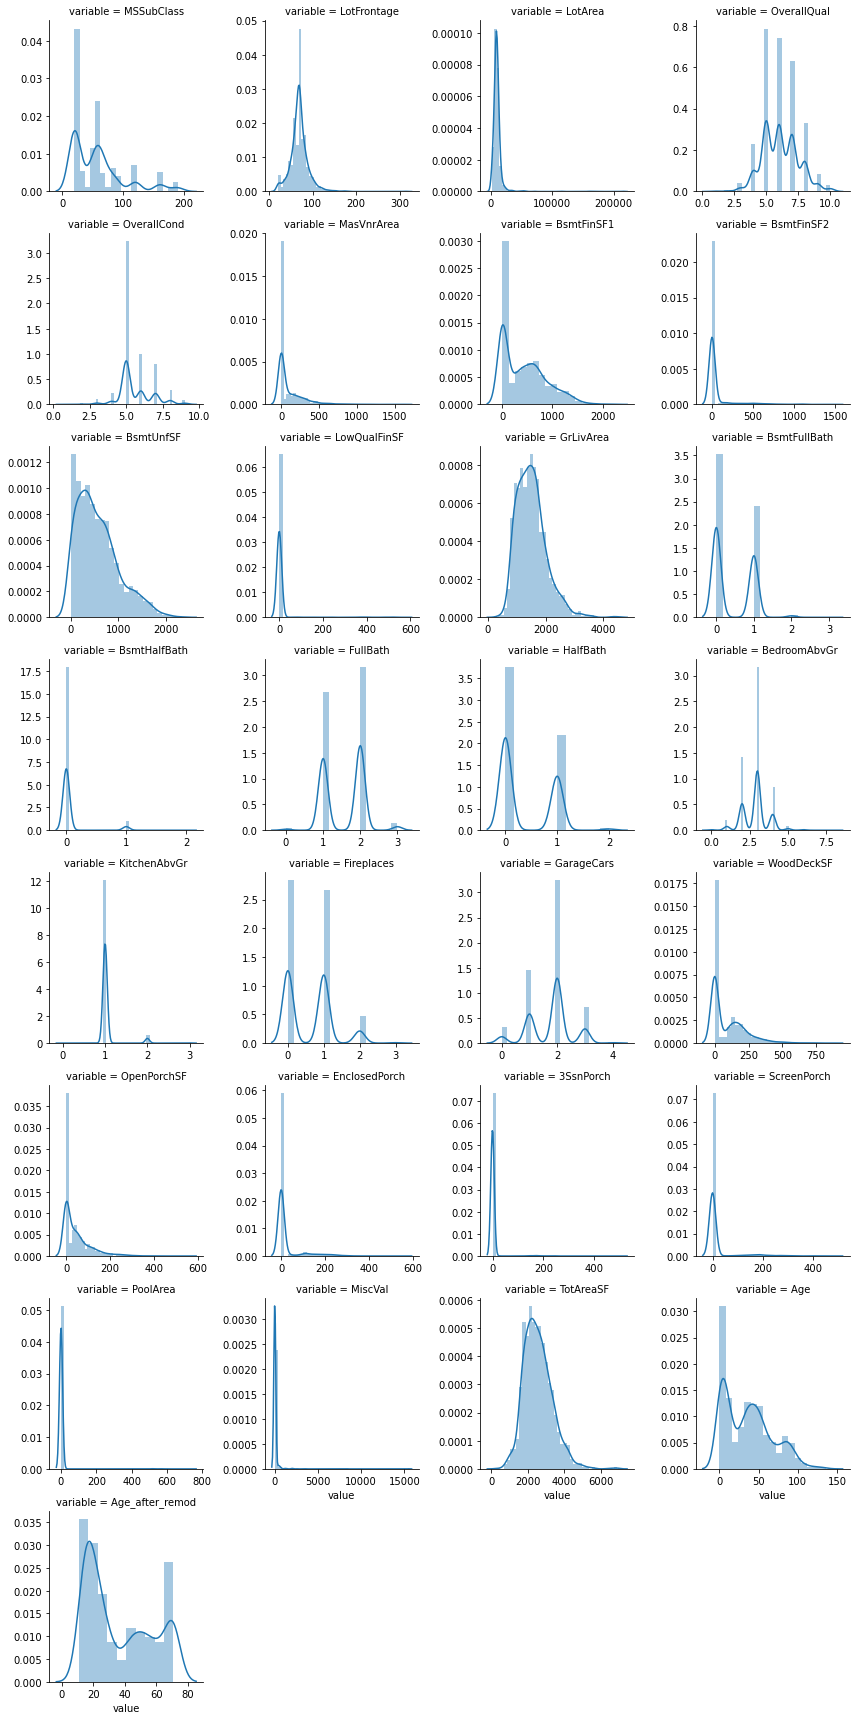

In [68]:
#Plotting them together
f = pd.melt(house, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

**We see that almost all of them as not normally skewed i.e either positive or negative skewed.**

In [69]:
#Checking them in a detailed way using scipy
from scipy.stats import skew
numeric_feat = house.dtypes[house.dtypes != "object"].index

# Check the skew of all numerical features
skewed_vals = house[numeric_feat].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_vals})
skewness.sort_values(by="Skew",ascending=False)

,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895
EnclosedPorch,3.083987


**Inferences Drawn:**
1. We will log transform all the columns so that the skewness will improve than what it is now. This is done to make the model robust. 
**Please Note: This will not guarantee normality to all the columns but it will just improve the skewness. Some columns might get a normal distribution after log transformation.**  

2. Since there are many columns with 0 values, doing a log transformation will give error. Hence will do a log(x+1) transformation.

In [70]:
#Log Transforming the numerical cols
house.MiscVal=((house.MiscVal)+1).transform(np.log)
house.LotArea=((house.LotArea)+1).transform(np.log)
house.PoolArea=((house.PoolArea)+1).transform(np.log)
house['3SsnPorch']=((house['3SsnPorch'])+1).transform(np.log)
house.LowQualFinSF=((house.LowQualFinSF)+1).transform(np.log)
house.TotAreaSF=((house.TotAreaSF)+1).transform(np.log)
house.ScreenPorch=((house.ScreenPorch)+1).transform(np.log)
house.BsmtFinSF2=((house.BsmtFinSF2)+1).transform(np.log)
house.EnclosedPorch=((house.EnclosedPorch)+1).transform(np.log)
house.MasVnrArea=((house.MasVnrArea)+1).transform(np.log)
house.OpenPorchSF=((house.OpenPorchSF)+1).transform(np.log)
house.LotFrontage=((house.LotFrontage)+1).transform(np.log)
house.WoodDeckSF=((house.WoodDeckSF)+1).transform(np.log)
house.BsmtUnfSF=((house.BsmtUnfSF)+1).transform(np.log)
house.GrLivArea=((house.GrLivArea)+1).transform(np.log)
house.BsmtFinSF1=((house.BsmtFinSF1)+1).transform(np.log)
house.Age=((house.Age)+1).transform(np.log)

# Data Preparation

In [71]:
#Split into X and y
y=house['SalePrice']
house=house.drop("SalePrice",1)
X=house.iloc[:,:]

## Manual Label Encoding Ordinal Variables

In [72]:
house.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
house.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
house.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
house.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
house.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
house.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
house.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
house.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
house.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
house.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
house.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
house.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
house.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
house.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
house.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
house.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
house.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
house.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
house.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
house.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
house.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

1. **After analysing all the columns, I found that these columns should be label encoded because they actually seem to be in some ordered category which has a ranking.**  

2. **Manually label encoded them because some of them are named top to bottom in ranking. Which means there was no way of an order to the prior labels.**

3. **Some columns like OverallQual, OverallCond are already label encoded hence, we won't label encode them anymore.**

In [73]:
#Checking the dataframe
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,TotAreaSF,Age,Age_after_remod
0,60,RL,4.189655,9.042040,None,3,3,Inside,2,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,5.283204,2,2,PConc,3,3,1,6,6.561031,1,0.0,5.017280,4,Y,4,0.0,7.444833,1,0,2,1,3,1,2,6,0,0,Attchd,2,2,3,3,2,0.000000,4.127134,0.000000,0.0,0.0,0.0,0,0,None,0.0,WD,Normal,7.850493,1.791759,18
1,20,RL,4.394449,9.169623,None,3,3,FR2,2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.000000,1,2,CBlock,3,3,4,5,6.886532,1,0.0,5.652489,4,Y,4,0.0,7.141245,0,1,2,0,3,1,1,6,1,3,Attchd,2,2,3,3,2,5.700444,0.000000,0.000000,0.0,0.0,0.0,0,0,None,0.0,WD,Normal,7.833996,3.465736,45
2,60,RL,4.234107,9.328212,None,2,3,Inside,2,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,5.093750,2,2,PConc,3,3,2,6,6.188264,1,0.0,6.075346,4,Y,4,0.0,7.488294,1,0,2,1,3,1,2,6,1,3,Attchd,2,2,3,3,2,0.000000,3.761200,0.000000,0.0,0.0,0.0,0,0,None,0.0,WD,Normal,7.903596,2.079442,19
3,70,RL,4.110874,9.164401,None,2,3,Corner,2,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,WdShing,None,0.000000,1,2,BrkTil,2,4,1,5,5.379897,1,0.0,6.293419,3,Y,4,0.0,7.448916,1,0,1,0,3,1,2,6,1,4,Detchd,1,3,3,3,2,0.000000,3.583519,5.609472,0.0,0.0,0.0,0,0,None,0.0,WD,Abnorml,7.813592,4.521789,51
4,60,RL,4.442651,9.565284,None,2,3,FR2,2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,5.860786,2,2,PConc,3,3,3,6,6.486161,1,0.0,6.196444,4,Y,4,0.0,7.695758,1,0,2,1,4,1,2,6,1,3,Attchd,2,3,3,3,2,5.262690,4.442651,0.000000,0.0,0.0,0.0,0,0,None,0.0,WD,Normal,8.114923,2.197225,21


In [74]:
#Converting MSSubClass into type object for One-Hot Encoding
house.MSSubClass=house.MSSubClass.astype("object")

In [75]:
# all categorical variables in the dataset
house_cat = X.select_dtypes(include=['object'])
house_cat.head()

,MSSubClass,MSZoning,Alley,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,CentralAir,GarageType,MiscFeature,SaleType,SaleCondition
0,60,RL,None,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Y,Attchd,None,WD,Normal
1,20,RL,None,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,Y,Attchd,None,WD,Normal
2,60,RL,None,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Y,Attchd,None,WD,Normal
3,70,RL,None,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,WdShing,None,BrkTil,Y,Detchd,None,WD,Abnorml
4,60,RL,None,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Y,Attchd,None,WD,Normal


## One Hot Dummy Encoding Nominal Variables

In [76]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_cat, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [77]:
# drop categorical variables 
X = X.drop(list(house_cat.columns), axis=1)

In [78]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [79]:
#Checking the Dtaframe
X.head(10)

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,TotAreaSF,Age,Age_after_remod,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,3,3,2,7,5,5.283204,2,2,3,3,1,6,6.561031,1,0.000000,5.017280,4,4,0.0,7.444833,1,0,2,1,3,1,2,6,0,0,2,2,3,3,2,0.000000,4.127134,0.000000,0.000000,0.0,0.0,0,0,0.000000,7.850493,1.791759,18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,4.394449,9.169623,3,3,2,6,8,0.000000,1,2,3,3,4,5,6.886532,1,0.000000,5.652489,4,4,0.0,7.141245,0,1,2,0,3,1,1,6,1,3,2,2,3,3,2,5.700444,0.000000,0.000000,0.000000,0.0,0.0,0,0,0.000000,7.833996,3.465736,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,4.234107,9.328212,2,3,2,7,5,5.093750,2,2,3,3,2,6,6.188264,1,0.000000,6.075346,4,4,0.0,7.488294,1,0,2,1,3,1,2,6,1,3,2,2,3,3,2,0.000000,3.761200,0.000000,0.000000,0.0,0.0,0,0,0.000000,7.903

In [80]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

**1. Since there are outliers in the data, we will use RobustScaler instead of normal scaling or StandardScaler because our data contains outliers which are needed to be kept. Hence RobustScaler which works based on percentiles and are therefore not influenced by a few number of very large marginal outliers.**  
**2. This is the second way after log transformation which helps in model robustness.**

In [81]:
from sklearn.preprocessing import RobustScaler

In [82]:
scaler=RobustScaler()
num_cols= X.select_dtypes(include=['int64','float64','int32'])
#we need to convert this dataframetype into list to use Standardization
num_cols=num_cols.columns.tolist()
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [83]:
X_train.head()

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,TotAreaSF,Age,Age_after_remod,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
653,-0.507542,0.179916,0.0,0.0,0.0,0.0,2.0,0.000000,0.0,0.0,-1.0,0.0,0.0,-0.6,-0.910110,0.0,0.000000,0.350002,0.0,0.0,0.0,-0.000752,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-0.50,-0.5,-1.0,0.0,0.0,0.0,0.791525,-0.776654,5.480639,0.0,0.0,0.0,0.0,3.0,0.0,-0.282083,0.545264,-0.026316,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
342,0.000000,-0.257970,0.0,0.0,0.0,-1.5,-1.0,1.147342,0.0,0.0,-3.0,-3.0,-1.0,-0.8,-0.910110,-1.0,0.000000,-4.708276,-1.5,-1.0,0.0,-0.763588,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,-0.50,-0.5,0.0,0.0,0.0,0.0,0.000000,-0.776654,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.184748,0.247381,1.157895,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
114,-0.447574,-0.635872,-1.0,0.0,-1

# Model Building and Evaluation

## Ridge and Lasso Regression

In [84]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.002, 0.005, 0.007, 0.009, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 25, 30, 40, 50, 60, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    6.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.007, 0.009,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 25, 30, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [86]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 6.98743015e-03  3.74016560e-02  2.18090853e-03  2.47340561e-03
 -1.28606299e-03  9.49198013e-02  4.09672027e-02  2.26667120e-02
  1.56504064e-02 -7.99991066e-03  1.38653195e-02 -1.91887171e-02
  1.59011242e-02  2.57287708e-02  4.24886539e-02  2.37041098e-03
 -2.99616402e-03 -8.13767041e-03  2.72008838e-02 -1.13541366e-02
 -5.99223929e-03  1.04932563e-01  2.57328745e-02 -5.00495179e-03
  3.49717017e-02  3.24666003e-02 -1.21730090e-02 -3.48571789e-02
  2.34969366e-02  3.34700814e-02  1.91192807e-02  1.19675274e-02
  1.38964631e-02  3.95742901e-02  1.14021618e-02 -1.87500026e-03
  2.32039092e-03  1.60329394e-02  7.19231781e-03 -5.71918901e-04
  1.06536909e-03  2.76123582e-03  1.12853667e-02  1.60568715e-02
  4.41033696e-04 -2.94584851e-03  1.10563628e-01 -6.02653336e-02
 -1.85733497e-02 -3.55706650e-02 -5.63752495e-03  8.23880343e-03
 -6.98590506e-03  6.26965638e-03  1.35712952e-02 -2.81540445e-03
  1.94628755e-03 -4.16047345e-03 -1.09855152e-02 -2.84132688e-03
 -7.56144925e-03  2.53863

In [87]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9374205943705793
0.9093405308581329
10.450092610589728
5.955436871140685
0.010245188833911498
0.013596887833654531


## Lasso

In [88]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.002,0.003,0.004, 0.005,0.006, 0.007,0.008, 0.009, 0.01, 0.05, 0.1,
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 100, 500, 1000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    6.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.007, 0.008, 0.009, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [90]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [91]:
lasso.coef_

array([ 6.11525492e-03,  3.62283971e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.05049419e-01,  4.26677755e-02,  3.89381845e-03,
        1.29096136e-02, -0.00000000e+00,  5.05746699e-03, -2.11880189e-02,
        1.45561118e-02,  7.14500595e-03,  5.83462054e-02, -0.00000000e+00,
       -1.34067223e-03, -6.24609299e-03,  2.33647168e-02, -1.66713009e-03,
       -4.41981705e-03,  1.14166228e-01,  2.61016995e-02, -0.00000000e+00,
        1.87901036e-02,  2.08798705e-02, -1.35311103e-02, -4.81098758e-02,
        2.80011571e-02,  3.41325739e-02,  2.33438618e-02,  0.00000000e+00,
        1.15653896e-02,  4.04521113e-02,  7.13248081e-03,  0.00000000e+00,
        0.00000000e+00,  1.42944266e-02,  3.21988437e-04, -4.84350217e-04,
        0.00000000e+00,  3.12599836e-03,  7.78058662e-03,  0.00000000e+00,
        8.43703456e-05, -3.80637686e-04,  1.18845743e-01, -8.63512925e-02,
       -1.07126370e-02, -8.58514660e-03, -0.00000000e+00,  0.00000000e+00,
       -1.06545064e-03,  

In [92]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9328368410135133
0.9072194328523066
11.21553048274047
6.0947721815144345
0.010995618120333794
0.013915004980626563


In [93]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
           'Ridge Regression': metric2
           }
rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'])
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.937421,0.932837
1,R2 Score (Test),0.909341,0.907219
2,RSS (Train),10.450093,11.215530
3,RSS (Test),5.955437,6.094772
4,MSE (Train),0.101219,0.104860
5,MSE (Test),0.116606,0.117962


In [94]:
betas = pd.DataFrame(index=X.columns)

In [95]:
betas.rows = X.columns

In [96]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

### Plotting Ridge Coeffecients

In [97]:
betas.sort_values(by="Ridge",ascending=False)

,Ridge,Lasso
TotAreaSF,0.110564,0.118846
GrLivArea,0.104933,0.114166
OverallQual,0.094920,0.105049
Neighborhood_Crawfor,0.055955,0.065878
SaleCondition_Normal,0.054447,0.051819
Condition1_Norm,0.047916,0.041331
Neighborhood_NoRidge,0.047242,0.059829
Neighborhood_StoneBr,0.047093,0.049340
Exterior1st_BrkFace,0.042823,0.045667
BsmtFinSF1,0.042489,0.058346


**Inferences Drawn:**
1. We see that in Ridge, we get important variables as TotAreaSF, GrLivArea, OverallQual, Neighborhood_Crawfor and so on.
2. This means that the price of the houses are positively affected by these variables. Hence the price of the houses go high when the values of TotAreaSF ( sum of basementarea, 1st floor area and 2nd floor area) and GrLivArea go high.
3. Also, house prices are greatly affected by the Overall Quality of the house. Prices go high when quality of the house increases.
4. House Prices of those houses are high which are located in Crawford.
5. House Prices of those houses are influenced by Condition of the house when it is sold.
6. Age of the house are negatively influencing the house prices. That means that the house prices decrease when the house is old at the time of selling. Customers prefer new houses.

### Plotting Lasso Coeffecients

In [98]:
betas.sort_values(by="Lasso",ascending=False)

,Ridge,Lasso
TotAreaSF,0.110564,0.118846
GrLivArea,0.104933,0.114166
OverallQual,0.094920,0.105049
Neighborhood_Crawfor,0.055955,0.065878
Neighborhood_NoRidge,0.047242,0.059829
BsmtFinSF1,0.042489,0.058346
SaleCondition_Normal,0.054447,0.051819
SaleType_New,0.039376,0.051250
Neighborhood_StoneBr,0.047093,0.049340
MSZoning_FV,0.036102,0.048620


**Inferences Drawn:**
1. 1. We see that in Lasso, we get important variables as TotAreaSF, GrLivArea, OverallQual, Neighborhood_Crawfor and so on.
2. This means that the price of the houses are positively affected by these variables. Hence the price of the houses go high when the values of TotAreaSF ( sum of basementarea, 1st floor area and 2nd floor area) and GrLivArea go high.
3. Also, house prices are greatly affected by the Overall Quality of the house. Prices go high when quality of the house increases.
4. House Prices of those houses are high which are located in Crawford followed by Northridge.

# Modified Lasso Regression for Subjective Question 1

### Ridge

In [103]:
#Fitting Ridge model for alpha = 40 and printing coefficients which have been penalised
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 7.60057004e-03  3.73738553e-02  9.71555697e-05  1.63795280e-03
 -1.51723519e-03  9.30057541e-02  3.97631231e-02  1.78993806e-02
  2.09632976e-02 -6.51302701e-03  1.73082821e-02 -1.77660462e-02
  1.63901556e-02  2.58261507e-02  3.91146085e-02  1.18196232e-03
 -2.19655737e-03 -7.93187297e-03  2.67281984e-02 -6.90255635e-03
 -5.49505698e-03  9.84363453e-02  2.53668198e-02 -5.42948370e-03
  3.32806923e-02  2.98248084e-02 -9.41146045e-03 -2.46897147e-02
  2.66840588e-02  3.19738989e-02  2.16386160e-02  1.49538151e-02
  1.45043984e-02  4.01680488e-02  9.98906115e-03  8.60875297e-04
  4.60162580e-03  1.50603304e-02  8.03989622e-03 -7.71152270e-04
  1.37249214e-03  2.88922510e-03  1.07764546e-02  1.03534810e-02
  2.52919703e-04 -2.25038781e-03  1.07173222e-01 -5.35502291e-02
 -2.01183222e-02 -2.85988535e-02 -2.64877920e-03  6.33021035e-03
 -5.98581405e-03  4.75391809e-03  1.13103787e-02 -2.31902791e-03
  2.31976348e-04 -3.82100556e-03 -9.59485738e-03 -3.92140490e-04
 -3.85586920e-03  1.35898

In [104]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9335200693841778
0.9077355263963899
11.10143863933265
6.0608699035672515
0.010883763371894756
0.013837602519559934


### Lasso

In [105]:
#Fitting Lasso model for alpha = 0.002 and printing coefficients which have been penalised

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [106]:
lasso.coef_

array([ 0.00460861,  0.03730737, -0.        ,  0.        , -0.        ,
        0.11611754,  0.0426124 ,  0.00098319,  0.01799091, -0.        ,
        0.00536068, -0.01534027,  0.01313637,  0.0034424 ,  0.06447818,
       -0.        , -0.00065055, -0.00682573,  0.02081165, -0.        ,
       -0.00261063,  0.1114334 ,  0.02209705, -0.        ,  0.01126684,
        0.01702739, -0.01136328, -0.01917707,  0.03136349,  0.03162979,
        0.02845766,  0.        ,  0.01133393,  0.04236612,  0.00770214,
        0.        ,  0.        ,  0.00939359,  0.        , -0.00087701,
        0.        ,  0.00271619,  0.000171  ,  0.        ,  0.        ,
       -0.        ,  0.12220328, -0.09952524, -0.0099778 , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.00535844, -0.        ,
        0.01910376, -0.00133342,  0.        ,  0.        ,  0.00

In [107]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9242449403205418
0.8987788130720428
12.6502861669704
6.649238016473184
0.012402241340167059
0.015180908713409096


In [108]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
           'Ridge Regression': metric2
           }
rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'])
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.933520,0.924245
1,R2 Score (Test),0.907736,0.898779
2,RSS (Train),11.101439,12.650286
3,RSS (Test),6.060870,6.649238
4,MSE (Train),0.104325,0.111365
5,MSE (Test),0.117633,0.123211


In [109]:
betas = pd.DataFrame(index=X.columns)

In [110]:
betas.rows = X.columns

In [111]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [112]:
betas.sort_values(by="Ridge",ascending=False)

,Ridge,Lasso
TotAreaSF,0.107173,0.122203
GrLivArea,0.098436,0.111433
OverallQual,0.093006,0.116118
SaleCondition_Normal,0.042791,0.031162
GarageCars,0.040168,0.042366
OverallCond,0.039763,0.042612
Neighborhood_Crawfor,0.039582,0.025040
BsmtFinSF1,0.039115,0.064478
Condition1_Norm,0.038792,0.036137
LotArea,0.037374,0.037307


In [113]:
betas.sort_values(by="Lasso",ascending=False)

,Ridge,Lasso
TotAreaSF,0.107173,0.122203
OverallQual,0.093006,0.116118
GrLivArea,0.098436,0.111433
BsmtFinSF1,0.039115,0.064478
OverallCond,0.039763,0.042612
GarageCars,0.040168,0.042366
LotArea,0.037374,0.037307
Condition1_Norm,0.038792,0.036137
Functional,0.031974,0.031630
KitchenQual,0.026684,0.031363


### Modified Lasso Regression for Subjective Question 3

In [114]:
#Dropping the first five important predictor variables
X_train_final=X_train.drop(["TotAreaSF","OverallQual","GrLivArea","Neighborhood_Crawfor","Neighborhood_NoRidge"],1)
X_test_final=X_test.drop(["TotAreaSF","OverallQual","GrLivArea","Neighborhood_Crawfor","Neighborhood_NoRidge"],1)

In [115]:
#Model Building
lasso = Lasso()
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004,0.0005,0.0006, 0.0007,0.0008,0.0009,
                    0.001, 0.002, 0.005, 0.007, 0.009, 0.01, 0.05, 0.1,
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 60, 100, 500, 1000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_final, y_train) 

Fitting 5 folds for each of 41 candidates, totalling 205 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:    7.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.005, 0.007, 0.009, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0003}


In [117]:
#Fitting Lasso model for alpha = 0.003 and printing coefficients which have been penalised

alpha =0.0003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_final, y_train) 

Lasso(alpha=0.0003)

In [118]:
lasso.coef_

array([ 0.01627455,  0.0572533 ,  0.00496853,  0.0011407 ,  0.00171146,
        0.03720883,  0.07482657,  0.05062046, -0.00695102,  0.03844642,
       -0.        ,  0.0184512 ,  0.        ,  0.08853864, -0.00252369,
        0.00402412,  0.00848796,  0.03071238, -0.02042112,  0.00059496,
        0.04065868,  0.        ,  0.12677405,  0.08470384,  0.01724225,
        0.        ,  0.03817261,  0.02532045,  0.03131049,  0.05375871,
        0.02159683,  0.07118285,  0.        , -0.        ,  0.00967245,
        0.01892783,  0.03841261,  0.00367097,  0.        ,  0.0037001 ,
       -0.        ,  0.09814792,  0.00395101, -0.00347062, -0.06843643,
       -0.01877163, -0.14473808, -0.        , -0.        ,  0.02203165,
        0.        ,  0.1119219 ,  0.01159482, -0.        , -0.04944048,
        0.        ,  0.        , -0.00208038, -0.        , -0.04753378,
        0.10899576,  0.13417062,  0.14416556,  0.13953953,  0.00285821,
        0.0503947 ,  0.04837587, -0.05458424, -0.        , -0.00

In [119]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_final)
y_pred_test = lasso.predict(X_test_final)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9064781318063453
0.8659061960170381
15.617153501368353
8.808646156773605
0.01531093480526309
0.020111064284871246


In [120]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
           'Ridge Regression': metric2
           }
rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'])
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.933520,0.906478
1,R2 Score (Test),0.907736,0.865906
2,RSS (Train),11.101439,15.617154
3,RSS (Test),6.060870,8.808646
4,MSE (Train),0.104325,0.123737
5,MSE (Test),0.117633,0.141813


In [121]:
betas = pd.DataFrame(index=X_train_final.columns)

In [122]:
betas.rows = X_train_final.columns

In [123]:
betas['Lasso'] = lasso.coef_

In [124]:
betas.nlargest(n=300,columns=['Lasso'])

,Lasso
Neighborhood_StoneBr,0.144332
MSZoning_RL,0.144166
MSZoning_RM,0.139540
MSZoning_RH,0.134171
FullBath,0.126774
MSSubClass_70,0.111922
MSZoning_FV,0.108996
PoolQC,0.098148
HouseStyle_2.5Unf,0.094979
Exterior1st_BrkFace,0.092781


# THANK YOU!!